# Music Genre Classification

A useful application of Machine Learning is to classify the genre to which a music audio file might belong to.For applications in which we listen music, this ML based classification enables us to build a recommendation system for various users.Based on the genres the user frequently listens to, we might reccomend songs to him/her.Although, the ML based approach might not be fully accurate, it does a great job and has a decent accuracy.

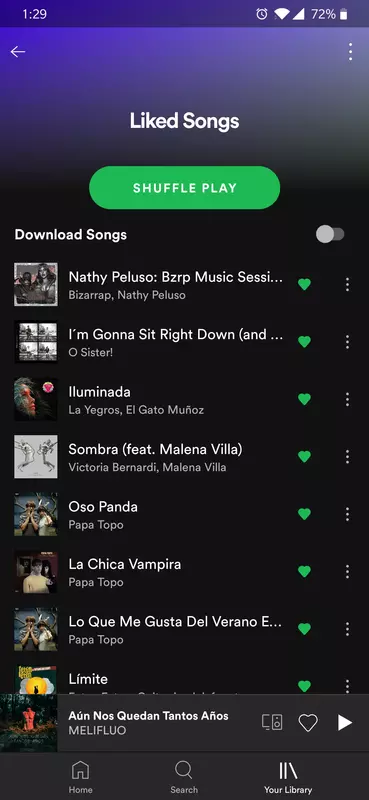


# Dataset

The dataset used here is GTZAN dataset.It is one of the most used public datasets used for research in Machine Learning for music genre classification.The dataset, which is avalaible on Kaggle andbe easily downloaded.
GTZAN provides us with the following directory:  

1.music_original

2.images_original 

3.features_30_sec

4.features_3_sec



music_original directory has 10 different folder. Each folder corresponds to one genre and has 100 audio samples each.
The audio samples are of 30 seconds each.
The music genres present are:

1.Rock  

2.Classical   

3.Country  

4.Disco  

5.hiphop  

6.Jazz  

7.Metal  

8.Pop 

9.Reggae 

10.Rock

Both features_30_sec.csv and feature_3_sec.csv are comma separated excel files each  containing a variety of features and their respective values corresponding to each audio sample.The features_30_sec has features and values of the 30 second audio samples. In features_3_sec.csv the features and values correspond to te audio samples split into 10 parts, each of 3 seconds.The features present are as  follows:


1.Filename

2.Length  of the file

3.Mean of Chroma_stft values

4.Variance of Chroma_stft values

5.Mean of rms values

6.Mean of spectral centroids

7.Variance of spectral_centroids

8.Spectral_bandwidth_mean

9.Spectral_bandwidth_var

10.Mean of Mel frequency cepstral coefficients (mfccs)

11.Variance of Mel frequency cepstral coefficients (mfccs)

12.Mean of Zero crossing rate values

13.Variance of Zero crossing rate values

14.Mean of Spectral rolloff values

15.Variance Spectral rolloff values

16.Mean of Harmony values

17.Variance of Harmony values

18.Mean of Perceptral values

19.Variance of Perceptral values

20.Label ( Music_genre)


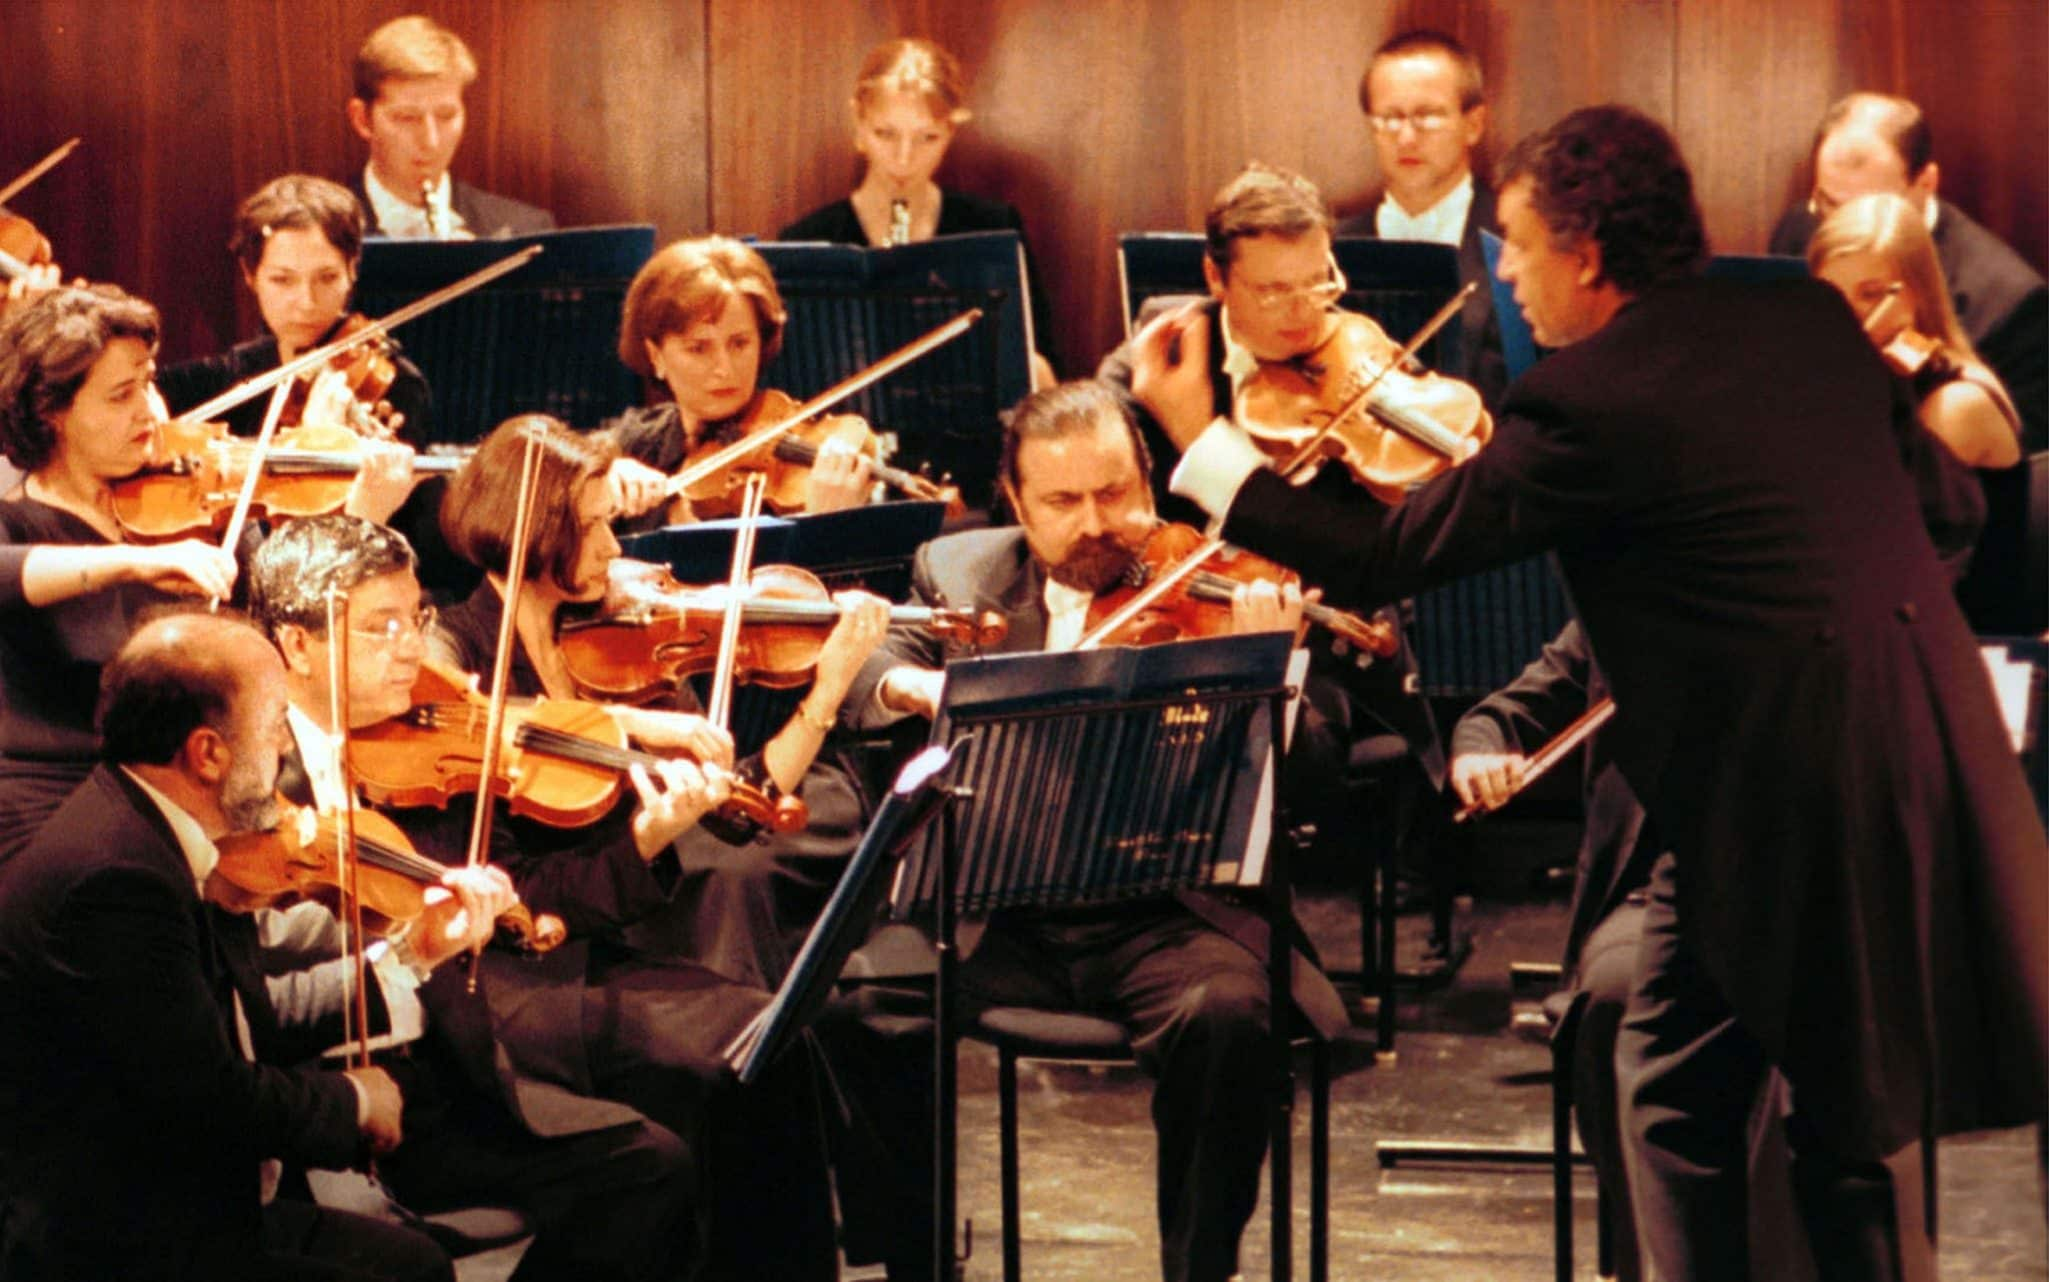
src: https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.telegraph.co.uk%2Fmusic%2Fclassical-music%2Fvivaldi-purcell-best-classical-music-winter-warmers%2F&psig=AOvVaw1q576QYSugdiq9Ns9DpudC&ust=1641841324595000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCKi37d2tpfUCFQAAAAAdAAAAABAJ

# Looking at the audio samples

In [1]:
import librosa
import librosa.display 
import IPython.display as ipd

Loading two audio sample belonging to the genre "Blues" and the other belonging to genre "Classical"

In [2]:
song_blues,sr_blues=librosa.load(r'C:\Users\PROMIT\Desktop\new_genres\new_blues\0.wav')
song_classical,sr_classical=librosa.load(r'C:\Users\PROMIT\Desktop\new_genres\new_classical\101.wav')

In [3]:
ipd.Audio(song_blues,rate=sr_blues)

In [4]:
ipd.Audio(song_classical,rate=sr_classical)

Visualizing amplitude of the sound waves

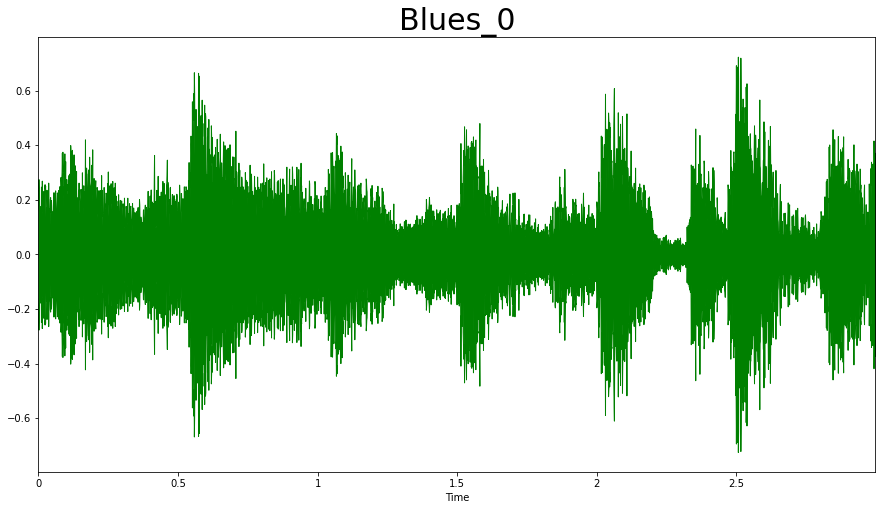

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
librosa.display.waveplot(y=song_blues,sr=sr_blues,color='g')
plt.title('Blues_0',fontsize=30)
plt.show()


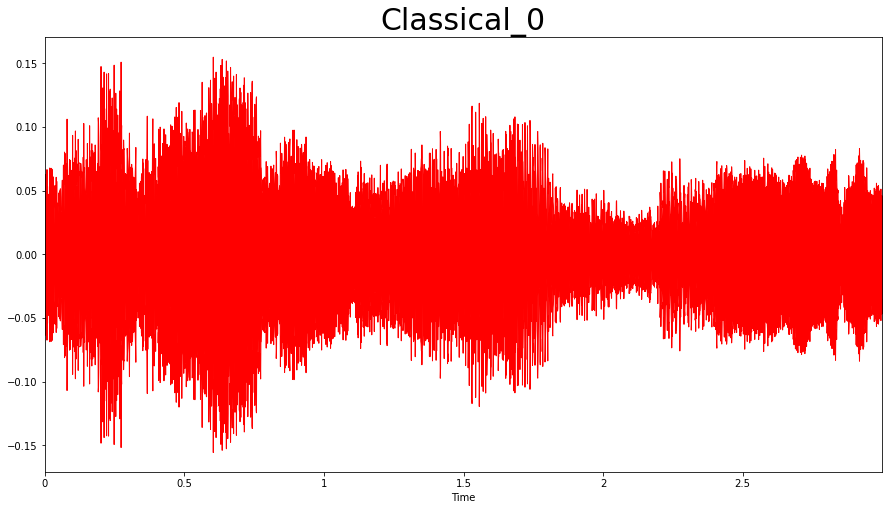

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
librosa.display.waveplot(y=song_classical,sr=sr_classical,color='r')
plt.title('Classical_0',fontsize=30)
plt.show()

# Loading data

In [7]:
import pandas as pd
import numpy as np
data=pd.read_csv(r'C:\Users\PROMIT\Desktop\features_3_sec.csv')
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [9]:
data.shape

(9990, 60)

# Data Preprocessing

Detecting null values in data

In [10]:
data.isnull().sum().sum()

0

Clearly, there are no missing values in this dataset

Extracting feature vector and target vector

In [11]:
features=data.drop(columns="label",axis=1)

In [12]:
features.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


In [13]:
target=data['label']

In [14]:
target.unique()

array(['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz',
       'metal', 'pop', 'reggae', 'rock'], dtype=object)

Since this is a multi-label classification problam,the target vector is one hot encoded to perform one vs all classification.

In [15]:
target=pd.get_dummies(target)

In [16]:
target.head()

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


# Description of the features

1.Filename-- This corresponds to the name of the file we are working with. Since, it is an insignificant feature for classification,it has been discarded.

In [17]:
features=features.drop(columns='filename',axis=1)

2.Length - It is the duration of the audio sample (in seconds).However it is irrelevant to look into the size of an audio file for classification problems.Hence it has also been discarded.

In [18]:
features=features.drop(columns='length',axis=1)

In [19]:
features.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,...,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767
1,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,...,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081
2,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,...,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122
3,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,...,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678
4,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,...,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694


***Chroma STFT***:

The Chroma value of an audio basically represents the intensity of the twelve distinctive pitch classes that are used to study music. They can be employed in the differentiation of the pitch class profiles between audio signals. Chroma STFT in Fig. 5. used short-term Fourier transformation to compute Chroma features. STFT represents information about the classification of pitch and signal structure. It depicts the spike with high values (as evident from the color bar net to the graph) in low values (dark regions).



Chromagram of the song_blues audio file:

In [20]:
frame_size=1024
hop_length=512


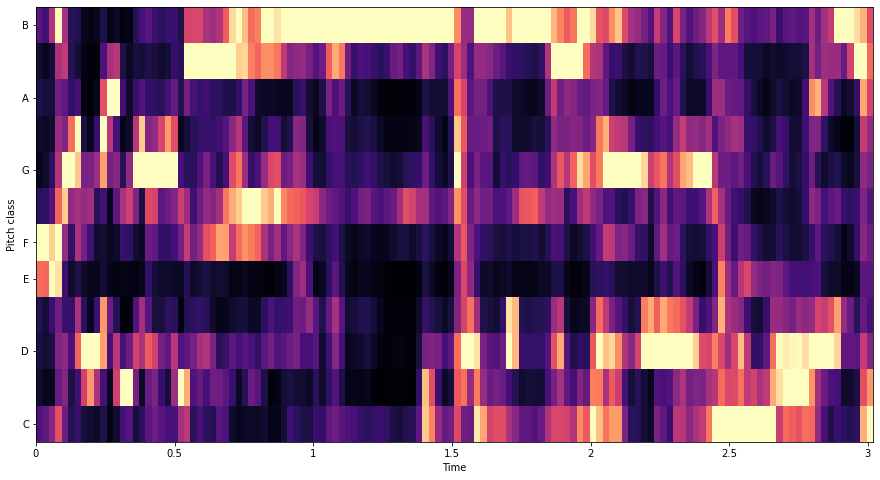

In [21]:
chromagram = librosa.feature.chroma_stft(song_blues, sr=sr_blues, hop_length=hop_length)
plt.figure(figsize=(15,8))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length);


Calculating mean and variance values of chroma_stft

In [22]:
chroma_stft_mean=np.mean(chromagram)
chroma_stft_var=np.var(chromagram)

***Spectral Centroid***

For a signal sampled as a N-point discrete sequence, the spectral centroid can be calculated as the sum of weighted magnitudes of fourier coefficients divided by the sum of magnitude of fourier coefficients.

Similar to spectrogram using STFT, we can obtain the variation of spectral centroid of a discrete signal by windowing it and computing spec_centroid of individual segments with a certain extent of overlap between them. This is achieved by librosa.feature.spectral_centroid() in Python.
(Source documentation: https://librosa.org/doc/0.7.2/generated/librosa.feature.spectral_centroid.html )


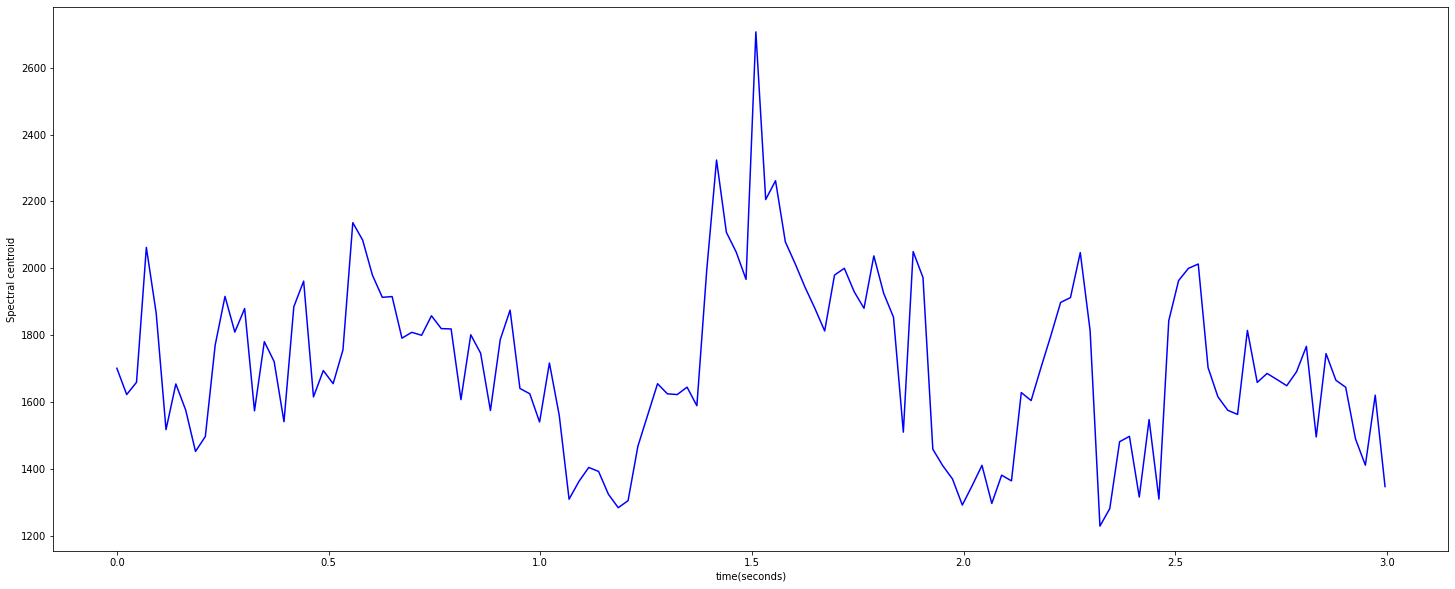

In [23]:
frame_size=1024
hop_length=512
spec_audio=librosa.feature.spectral_centroid(y=song_blues,sr=sr_blues,n_fft=frame_size,hop_length=hop_length)[0]
frames = range(len(spec_audio))
t = librosa.frames_to_time(frames, hop_length=hop_length)
plt.figure(figsize=(25,10))

plt.plot(t, spec_audio, color='b')
plt.xlabel('time(seconds)')
plt.ylabel('Spectral centroid')
plt.show()


Calculating mean and variance values of spectral_centroids

In [24]:
spec_audio_mean=np.mean(spec_audio)
spec_audio_var=np.mean(spec_audio)

***Spectral Bandwidth***



***Mel Frequency Cepstral Coefficients***

“Mel Frequency Cepstral Coefficients (MFCCs) are a feature widely used in automatic speech and speaker recognition. They were introduced by Davis and Mermelstein in the 1980's, and have been state-of-the-art ever since. Prior to the introduction of MFCCs, Linear Prediction Coefficients (LPCs) and Linear Prediction Cepstral Coefficients (LPCCs) and were the main feature type for automatic speech recognition (ASR), especially with HMM classifiers. The main point to understand about speech is that the sounds generated by a human are filtered by the shape of the vocal tract including tongue, teeth etc. This shape determines what sound comes out. If we can determine the shape accurately, this should give us an accurate representation of the phoneme being produced. The shape of the vocal tract manifests itself in the envelope of the short time power spectrum, and the job of MFCCs is to accurately represent this envelope.”

(Source: http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/)

Proposed algorithm  for calculating mel-coefficients:

“
1.	Frame the signal into short frames.
2.	For each frame calculate the periodogram estimate of the power spectrum.
3.	Apply the mel filterbank to the power spectra, sum the energy in each filter.
4.	Take the logarithm of all filterbank energies.
5.	Take the DCT of the log filterbank energies.

“(Source: http://www.practicalcryptography.com/miscellaneous/machine-learning/guide-mel-frequency-cepstral-coefficients-mfccs/)



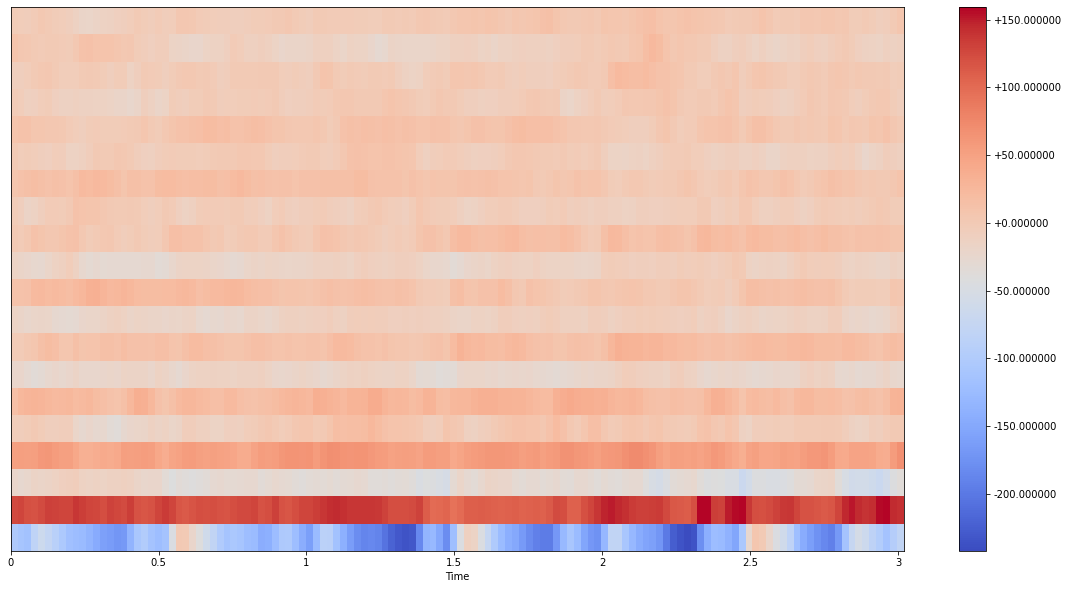

In [25]:
mfccs=librosa.feature.mfcc(song_blues,n_mfcc=20,sr=sr_blues)
# # Visualizing the MFCCs

plt.figure(figsize=(20,10))
librosa.display.specshow(mfccs,x_axis="time",sr=sr_blues)
plt.colorbar(format="%+2f")
plt.show()


Zero Crossing Rate

The rate at which a signal goes from positive to zero to negative or from negative to zero to positive is defined as the zero-crossing rate of the signal.

The signal can be further sub divided into smaller segments and the zero crossing rate for each segment can be calculated to obtain mean and variance of zero crossing rate values.

In [26]:
zero_crossing_rate=librosa.feature.zero_crossing_rate(song_blues,frame_length=2048,hop_length=512)
#Calculating zero crossing rate mean:
zero_crossing_rate_mean=zero_crossing_rate[0].mean()
#Calculating zero crossing rate variance:
zero_crossing_rate_variance=zero_crossing_rate[0].var()



Spectral Rolloff

The roll-off frequency is defined for each frame as the center frequency for a spectrogram bin such that at least roll_percent (0.85 by default) of the energy of the spectrum in this frame is contained in this bin and the bins below. This can be used to, e.g., approximate the maximum (or minimum) frequency by setting roll_percent to a value close to 1 (or 0).
 (Source: https://librosa.org/doc/main/generated/librosa.feature.spectral_rolloff.html  )


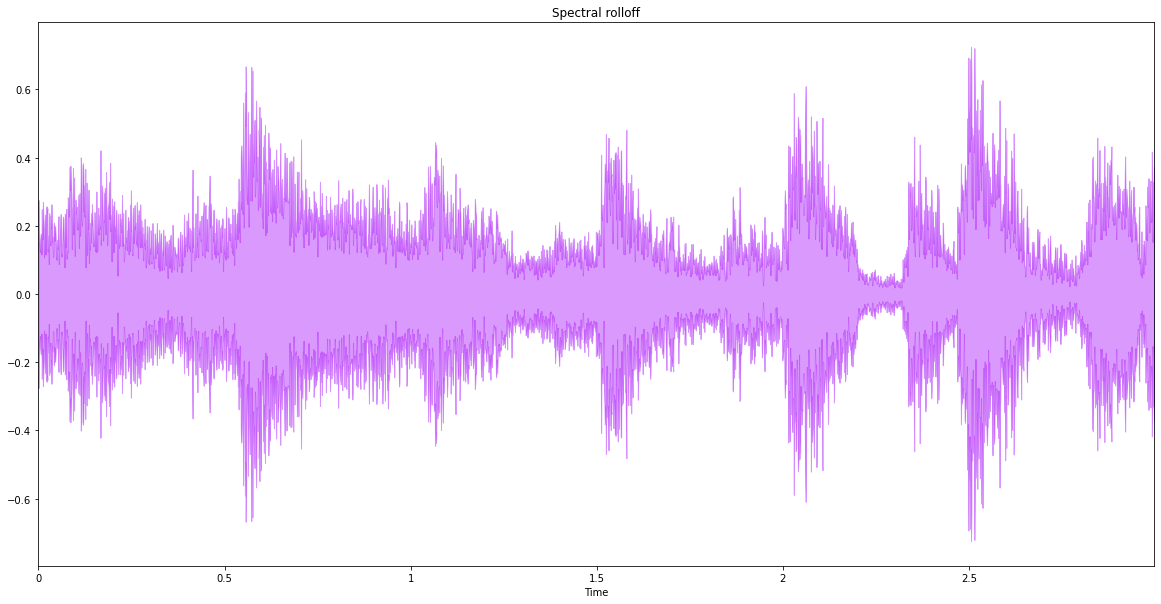

In [27]:
spectral_rolloff = librosa.feature.spectral_rolloff(song_blues, sr=sr_blues)[0]
plt.figure(figsize=(20,10))
librosa.display.waveplot(song_blues, sr=sr_blues, alpha=0.4, color = '#A300F9');
plt.title('Spectral rolloff')
plt.show()

Harmonics and Perceptual

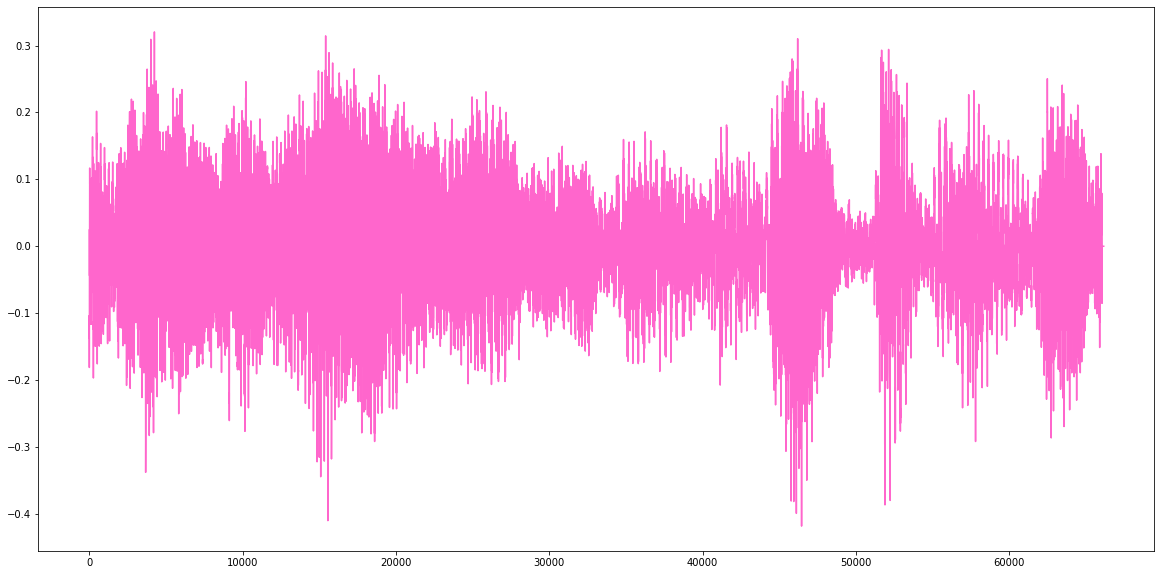

In [28]:
harmonics, perceptual = librosa.effects.hpss(song_blues)
plt.figure(figsize = (20,10))
plt.plot(harmonics,color='#FF66CC'); 

plt.figure(figsize = (20, 10))
plt.plot(perceptual, color = '#FFB100');


Splliting training and testing dataset

In [47]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(features,target,test_size=0.2,random_state=42)
print("The number of training examples is :{}\n".format(X_train.shape[0]))
print("The number of testing  examples is :{}".format(X_test.shape[0]))

The number of training examples is :7992

The number of testing  examples is :1998


Scaling features

In [48]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

#Building an Artificial Neural Network (ANN) model for classification

In [49]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [50]:
model=Sequential()
model.add(Dense(512,input_shape=(57,),activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(32,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 512)               29696     
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_9 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)               

In [51]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [52]:
history=model.fit(x=X_train,y=Y_train,validation_split=0.2,steps_per_epoch=20,epochs=600)

Epoch 1/600
20/20 [==============================] - 0s 23ms/step - loss: 2.0913 - accuracy: 0.2648 - val_loss: 1.7146 - val_accuracy: 0.4371
Epoch 2/600
20/20 [==============================] - 0s 12ms/step - loss: 1.6405 - accuracy: 0.4150 - val_loss: 1.3680 - val_accuracy: 0.5285
Epoch 3/600
20/20 [==============================] - 0s 12ms/step - loss: 1.3743 - accuracy: 0.5214 - val_loss: 1.1645 - val_accuracy: 0.5810
Epoch 4/600
20/20 [==============================] - 0s 12ms/step - loss: 1.1824 - accuracy: 0.5872 - val_loss: 1.0214 - val_accuracy: 0.6385
Epoch 5/600
20/20 [==============================] - 0s 11ms/step - loss: 1.0574 - accuracy: 0.6402 - val_loss: 0.9125 - val_accuracy: 0.6848
Epoch 6/600
20/20 [==============================] - 0s 11ms/step - loss: 0.9679 - accuracy: 0.6701 - val_loss: 0.8392 - val_accuracy: 0.7305
Epoch 7/600
20/20 [==============================] - 0s 12ms/step - loss: 0.8896 - accuracy: 0.7050 - val_loss: 0.7715 - val_accuracy: 0.7548
Epoch 

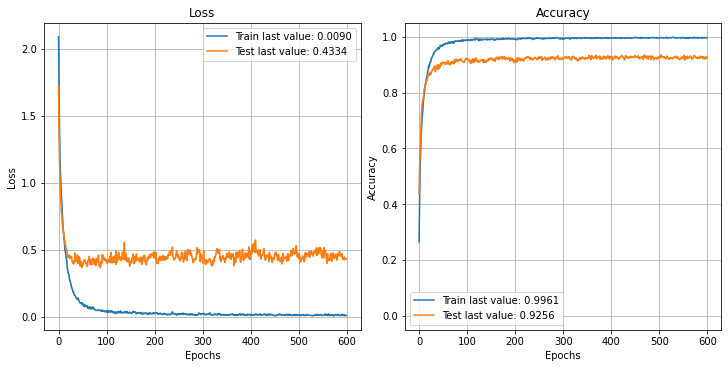

In [55]:
show_history(history)
plot_history(history, path="standard.png")
plt.close()

# The validation accuracy of the model stands at 92.56%

Saving the model

In [57]:
model.save('Promit_music_model_GTZAN.h5')

# Predictions on test data

In [58]:
predictions=model.predict(X_test)

In [59]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5215559601783752
Test accuracy: 0.9209209084510803


# Confusion_matrix

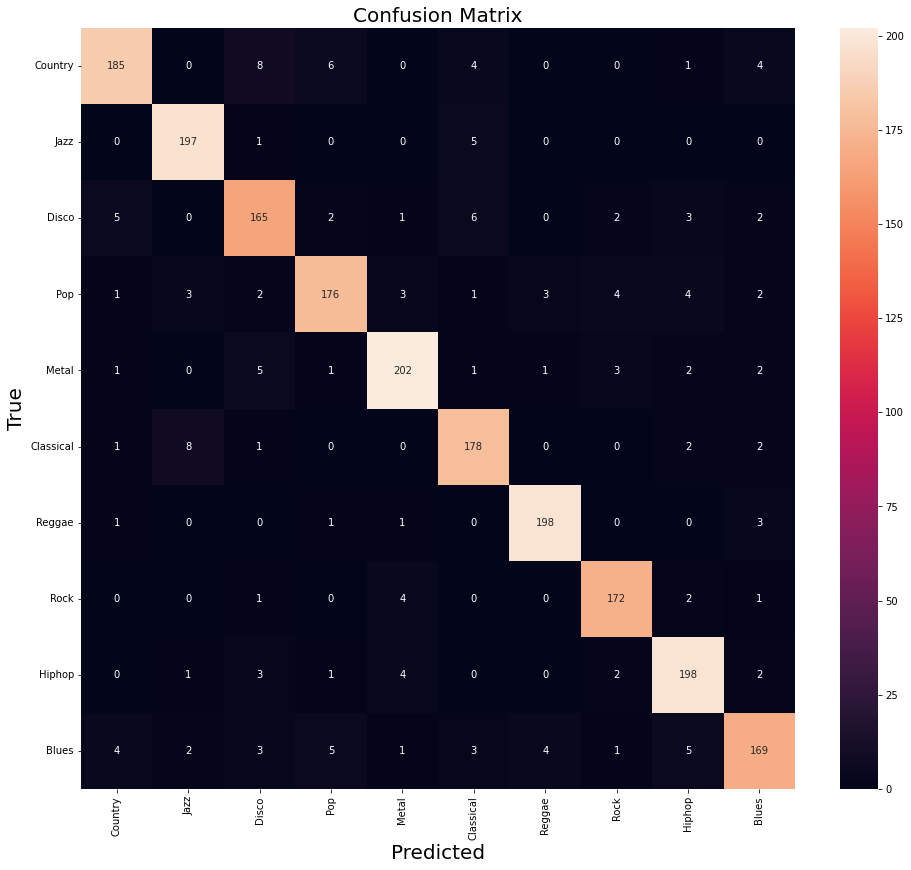

In [87]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
rounded_predictions=np.argmax(model.predict(X_test),axis=-1)
true_classification=[]
Y_test_array=np.array(Y_test)
for item in range(Y_test.shape[0]):
    true_classification.append(np.argmax(Y_test_array[item]))
true_classification=np.array(true_classification)   
cm = confusion_matrix(true_classification, rounded_predictions)
labels={"Blues","Classical","Country","Disco","Hiphop","Jazz","Metal","Pop","Reggae","Rock"} 
# Plot confusion matrix in a beautiful manner
fig = plt.figure(figsize=(16, 14))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(labels, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(labels, fontsize = 10)
plt.yticks(rotation=0)
plt.title('Confusion Matrix', fontsize=20)
plt.show()


#  ***Conclusion:***  The test accuracy of our model is 92.092 % which is very close to the validation accuracy